In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import time
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance
from tqdm import tqdm
from collections import Counter
from multiprocessing import Pool, cpu_count
# 代码运行耗时查看器
from line_profiler import LineProfiler
from sklearn.cluster import KMeans

from recall import topk_recall_association_rules_qyxs_icf
from process import load_click_data, data_generate, item_cluster_feat, user_cluster_feat, \
                     matrix_word2vec_embedding, embedding_fea_pca, get_train_test_data, \
                     Pool_feature_concat, phase_submit_save, add_time_statistics, \
                     add_user_statistics, add_item_statistics, load_pool_feature, \
                     remove_pool_feature, user_feat_data, age_sex_city_data, null_xgb_predict, add_user_profile_info
from model import train_model_lgb
from metric import metrics_recall 

train_path = '../data/underexpose_train'  
test_path = '../data/underexpose_test'

have not glove
have not glove


# 内容

- 相对于V1增加了用户最喜爱session，用户不同session数
- item_n_clusters、user_n_clusters改为50
- 用户画像信息（但是重要性很低）
- lgb模型metric改为"MAP"

In [2]:
# train
phase_append = False
flag_test = False
recall_num = 700
topk = 50
# 构造特征时取用户最近点击项目数
click_topn=5
# pca成分数量
pca_n_components=5
# 项目聚类数
item_n_clusters=50
# 用户聚类数
user_n_clusters=50
nrows = None 
# embedding特征与召回数据已有，直接取为True
topk_recall_read = True
embedding_feat_read = True
# 进程处理中数据划分份数或者任务数量
batchs_n = 4
# 进程中open的cpu核数
open_cpu_n = 5



# test
# phase_append = False
# flag_test = True
# recall_num = 50
# topk = 50
# nrows = 1000

# txt与img余弦相似度字典
txt_cosine_similarity_dict = np.load('../data/process/txt_cosine_similarity_dict.npy', allow_pickle=True).item()
img_cosine_similarity_dict = np.load('../data/process/img_cosine_similarity_dict.npy', allow_pickle=True).item()
type(txt_cosine_similarity_dict['42844']['67898'])

numpy.float32

phase: 9
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  9  -------------
phase:  9  top_ 0  :  hit_num :  275 hit_rate :  0.015031429352282044  data_num :  18295

phase:  9  top_ 70  :  hit_num :  2361 hit_rate :  0.12905165345722874  data_num :  18295

phase:  9  top_ 140  :  hit_num :  2871 hit_rate :  0.15692812243782453  data_num :  18295

phase:  9  top_ 210  :  hit_num :  3173 hit_rate :  0.1734353648537852  data_num :  18295

phase:  9  top_ 280  :  hit_num :  3380 hit_rate :  0.18474993167532114  data_num :  18295

phase:  9  top_ 350  :  hit_num :  3538 hit_rate :  0.1933861710849959  data_num :  18295

phase:  9  top_ 420  :  hit_num :  3696 hit_rate :  0.20202241049467068  data_num :  18295

phase:  9  top_ 490  :  hi

13059it [00:24, 525.70it/s]

------- 构建样本 -----------


15020it [00:28, 526.64it/s]

............... train len= 712600
............... test  len= 317800


15073it [00:28, 524.89it/s]

----------- 加入特征 train -----------


28170it [00:54, 525.61it/s]

------- 构建样本 -----------


30131it [00:57, 524.68it/s]

............... train len= 699300
............... test  len= 317275


15169it [00:29, 523.80it/s]

----------- 加入特征 train -----------


27819it [00:55, 436.83it/s]

------- 构建样本 -----------


29571it [00:59, 365.31it/s]

............... train len= 719600
............... test  len= 300125


45027it [01:28, 395.18it/s]

----------- 加入特征 train -----------


712600it [24:24, 486.67it/s]
699300it [23:57, 486.31it/s]
733109it [25:05, 518.78it/s]

----------- 加入特征 test -----------


690128it [23:39, 513.38it/s]

----------- 加入特征 test -----------


760200it [26:01, 486.92it/s]
719600it [24:39, 486.42it/s]
33879it [01:08, 449.97it/s]

----------- 加入特征 test -----------


35104it [01:12, 531.61it/s]

----------- 加入特征 test -----------


317275it [10:45, 491.33it/s]
317800it [10:48, 489.82it/s]
291200it [09:54, 489.45it/s]
300125it [10:13, 489.36it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase9...'
-------------- age特征缺失预测 --------------
[0]	validation_0-mlogloss:2.06406
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.72533
Stopping. Best iteration:
[124]	validation_0-mlogloss:1.71129

-------------- sex特征缺失预测 --------------
[0]	validation_0-auc:0.72462
Will train until validation_0-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.83133
Stopping. Best iteration:
[93]	validation_0-auc:0.83757

-------------- city特征缺失预测 --------------
[0]	validation_0-mlogloss:1.78561
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.74664
Stopping. Best iteration:
[52]	validation_0-mlogloss:1.69654

feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item

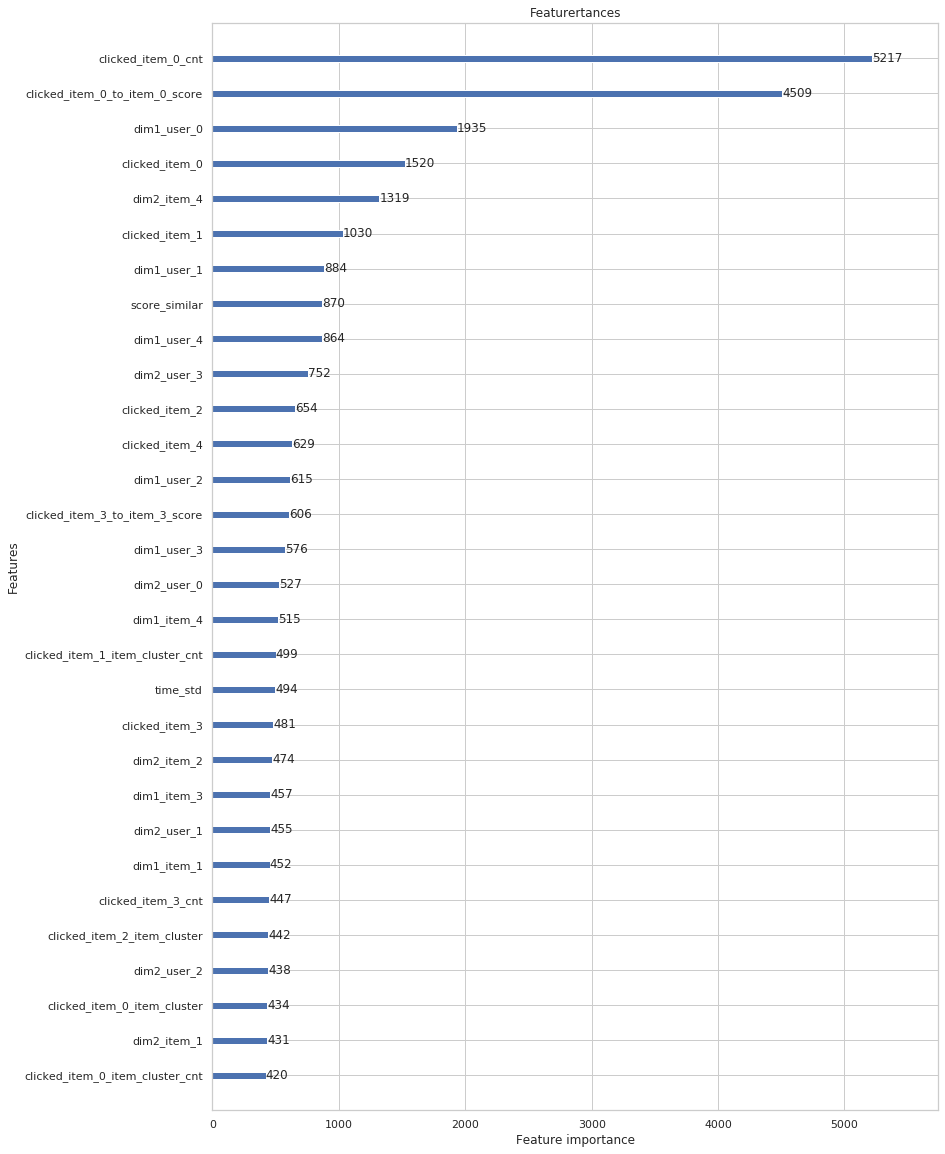

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 9


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)
    
    
    # 用户画像特征缺失预测
    user_feat = user_feat_data(dict_embedding_user_only, user_cluster, time_feat)
    for i, col in enumerate(['age', 'sex', 'city']):
        X_, y_, X_test, data_ = age_sex_city_data(user_feat, col=col)
        tmp = null_xgb_predict(X_, y_, X_test, data_, col=col)
        if i==0:
            user_profile_feat = tmp
        else:
            user_profile_feat = user_profile_feat.merge(tmp, on=['user_id'], how='left')    

    # 增加用户画像特征、时间统计特征、用户聚类统计特征、项目聚类统计特征 
    feature_all = add_user_profile_info(feature_all, user_profile_feat)
    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 8
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  8  -------------
phase:  8  top_ 0  :  hit_num :  321 hit_rate :  0.01776916689731525  data_num :  18065

phase:  8  top_ 70  :  hit_num :  2230 hit_rate :  0.12344312205923055  data_num :  18065

phase:  8  top_ 140  :  hit_num :  2716 hit_rate :  0.15034597287572654  data_num :  18065

phase:  8  top_ 210  :  hit_num :  3046 hit_rate :  0.168613340714088  data_num :  18065

phase:  8  top_ 280  :  hit_num :  3269 hit_rate :  0.18095765292001106  data_num :  18065

phase:  8  top_ 350  :  hit_num :  3437 hit_rate :  0.19025740381954054  data_num :  18065

phase:  8  top_ 420  :  hit_num :  3587 hit_rate :  0.19856075283697758  data_num :  18065

phase:  8  top_ 490  :  hit

13800it [00:26, 522.87it/s]

------- 构建样本 -----------


15708it [00:30, 525.24it/s]

............... train len= 690200
............... test  len= 312200


15814it [00:30, 525.26it/s]

----------- 加入特征 train -----------


14155it [00:27, 513.04it/s]

------- 构建样本 -----------


31928it [01:01, 522.41it/s]

............... train len= 660800
............... test  len= 322700


32034it [01:01, 522.92it/s]

----------- 加入特征 train -----------


46160it [01:29, 520.13it/s]

------- 构建样本 -----------


32085it [01:03, 362.07it/s]

............... train len= 745500
............... test  len= 310800


48322it [01:34, 523.01it/s]

----------- 加入特征 train -----------


660800it [22:47, 483.06it/s]
700073it [23:59, 456.87it/s]

----------- 加入特征 test -----------


690200it [23:42, 485.17it/s]
661503it [22:50, 390.40it/s]

----------- 加入特征 test -----------


723100it [24:48, 485.91it/s]
28243it [01:00, 375.88it/s]]

----------- 加入特征 test -----------


745500it [25:45, 482.39it/s]
102028it [03:31, 524.71it/s]

----------- 加入特征 test -----------


322700it [11:08, 483.02it/s]
312200it [10:44, 484.77it/s]
326900it [11:10, 487.37it/s]
310800it [10:32, 491.49it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase8...'
-------------- age特征缺失预测 --------------
[0]	validation_0-mlogloss:2.06228
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.70330
Stopping. Best iteration:
[144]	validation_0-mlogloss:1.69632

-------------- sex特征缺失预测 --------------
[0]	validation_0-auc:0.71096
Will train until validation_0-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.82238
Stopping. Best iteration:
[145]	validation_0-auc:0.82501

-------------- city特征缺失预测 --------------
[0]	validation_0-mlogloss:1.78714
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.75462
Stopping. Best iteration:
[47]	validation_0-mlogloss:1.70820

feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_ite

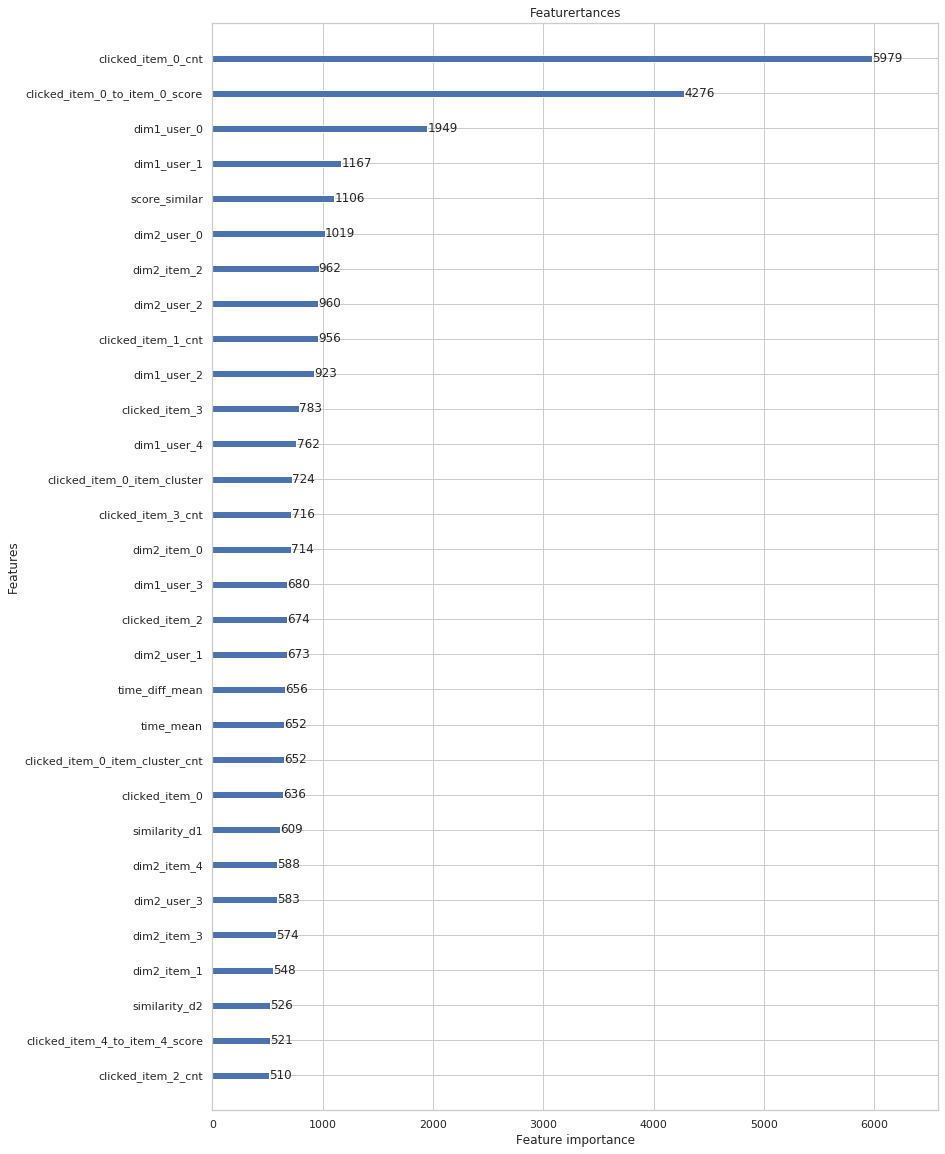

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 8


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)
    
    
    # 用户画像特征缺失预测
    user_feat = user_feat_data(dict_embedding_user_only, user_cluster, time_feat)
    for i, col in enumerate(['age', 'sex', 'city']):
        X_, y_, X_test, data_ = age_sex_city_data(user_feat, col=col)
        tmp = null_xgb_predict(X_, y_, X_test, data_, col=col)
        if i==0:
            user_profile_feat = tmp
        else:
            user_profile_feat = user_profile_feat.merge(tmp, on=['user_id'], how='left')    

    # 增加用户画像特征、时间统计特征、用户聚类统计特征、项目聚类统计特征 
    feature_all = add_user_profile_info(feature_all, user_profile_feat)
    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


In [3]:

now_phase = 7


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)
    
    
    # 用户画像特征缺失预测
    user_feat = user_feat_data(dict_embedding_user_only, user_cluster, time_feat)
    for i, col in enumerate(['age', 'sex', 'city']):
        X_, y_, X_test, data_ = age_sex_city_data(user_feat, col=col)
        tmp = null_xgb_predict(X_, y_, X_test, data_, col=col)
        if i==0:
            user_profile_feat = tmp
        else:
            user_profile_feat = user_profile_feat.merge(tmp, on=['user_id'], how='left')    

    # 增加用户画像特征、时间统计特征、用户聚类统计特征、项目聚类统计特征 
    feature_all = add_user_profile_info(feature_all, user_profile_feat)
    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 7
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  7  -------------
phase:  7  top_ 0  :  hit_num :  305 hit_rate :  0.01694067984892246  data_num :  18004

phase:  7  top_ 70  :  hit_num :  2325 hit_rate :  0.12913796934014662  data_num :  18004

phase:  7  top_ 140  :  hit_num :  2891 hit_rate :  0.16057542768273717  data_num :  18004

phase:  7  top_ 210  :  hit_num :  3190 hit_rate :  0.17718284825594313  data_num :  18004

phase:  7  top_ 280  :  hit_num :  3389 hit_rate :  0.1882359475672073  data_num :  18004

phase:  7  top_ 350  :  hit_num :  3552 hit_rate :  0.19728949122417241  data_num :  18004

phase:  7  top_ 420  :  hit_num :  3694 hit_rate :  0.20517662741612974  data_num :  18004

phase:  7  top_ 490  :  hi

14314it [00:27, 521.61it/s]

------- 构建样本 -----------


16222it [00:31, 522.53it/s]

............... train len= 723275
............... test  len= 310100


16328it [00:31, 521.76it/s]

----------- 加入特征 train -----------


30362it [01:00, 425.87it/s]

------- 构建样本 -----------


32079it [01:04, 517.96it/s]

............... train len= 667800
............... test  len= 321300


15910it [00:32, 515.90it/s]

----------- 加入特征 train -----------


46384it [01:32, 413.98it/s]

------- 构建样本 -----------


31786it [01:05, 379.12it/s]

............... train len= 752500
............... test  len= 310100


16063it [00:32, 516.37it/s]

----------- 加入特征 train -----------


667800it [23:07, 481.19it/s]
708899it [24:22, 487.25it/s]

----------- 加入特征 test -----------


723275it [25:02, 481.27it/s]
698551it [24:08, 521.08it/s]

----------- 加入特征 test -----------


756000it [26:01, 484.10it/s]
53720it [01:51, 508.62it/s]]

----------- 加入特征 test -----------


752500it [26:02, 481.69it/s]
59927it [02:05, 361.14it/s]]

----------- 加入特征 test -----------


321300it [11:06, 482.04it/s]
310100it [10:40, 484.33it/s]
316400it [10:49, 487.03it/s]
310100it [10:31, 491.18it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase7...'


FileNotFoundError: [Errno 2] No such file or directory: '../cache/feature_all.pkl'

-------------- age特征缺失预测 --------------
[0]	validation_0-mlogloss:2.06343
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.72107
Stopping. Best iteration:
[111]	validation_0-mlogloss:1.70343

-------------- sex特征缺失预测 --------------
[0]	validation_0-auc:0.75420
Will train until validation_0-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.84417
Stopping. Best iteration:
[86]	validation_0-auc:0.84854

-------------- city特征缺失预测 --------------
[0]	validation_0-mlogloss:1.78598
Will train until validation_0-mlogloss hasn't improved in 200 rounds.
[200]	validation_0-mlogloss:1.76552
Stopping. Best iteration:
[44]	validation_0-mlogloss:1.71118

feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
  

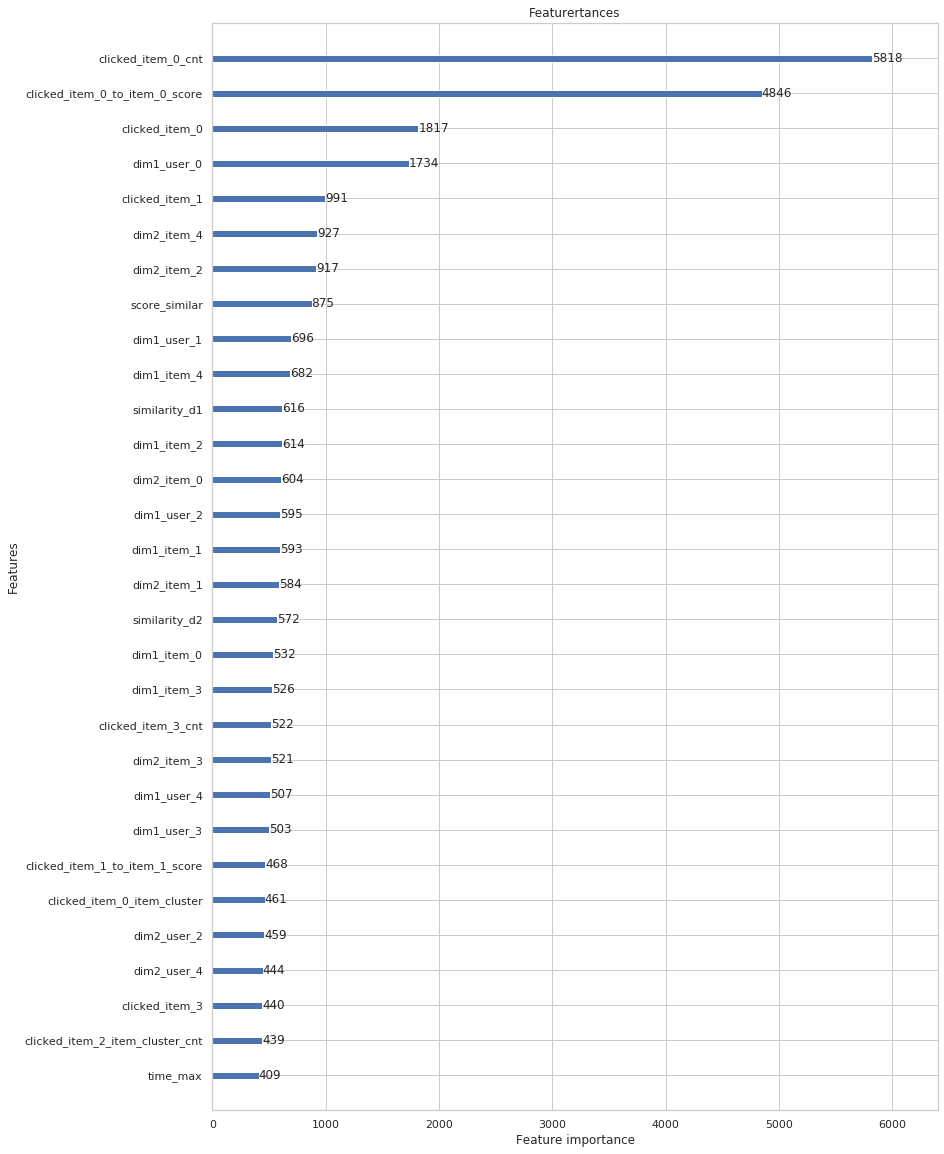

--------------------------- 保存预测文件 ---------------------


In [5]:
    # 用户画像特征缺失预测
    user_feat = user_feat_data(dict_embedding_user_only, user_cluster, time_feat)
    for i, col in enumerate(['age', 'sex', 'city']):
        X_, y_, X_test, data_ = age_sex_city_data(user_feat, col=col)
        tmp = null_xgb_predict(X_, y_, X_test, data_, col=col)
        if i==0:
            user_profile_feat = tmp
        else:
            user_profile_feat = user_profile_feat.merge(tmp, on=['user_id'], how='left')    

    # 增加用户画像特征、时间统计特征、用户聚类统计特征、项目聚类统计特征 
    feature_all = add_user_profile_info(feature_all, user_profile_feat)
    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)

In [ ]:
# res7 = pd.read_csv("../result/submit-wanping7-7-2020-06-07 19:12:01.csv", header=None)
# res8 = pd.read_csv("../result/submit-wanping7-8-2020-06-07 17:07:39.csv", header=None)
# res9 = pd.read_csv("../result/submit-wanping7-9-2020-06-07 18:13:02.csv", header=None)
# res = pd.concat([res7, res8, res9], axis=0)
# res.to_csv("../result/submit_traceb_v1.csv", c, index=False)

# res.shape
# # (5367, 51)